# Proyecto 2: Análisis de mercado inmobiliario

**Presentado por: Anamaria Garcia Daza**

**PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

**PARTE B - Modelos Avanzados**

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

**PARTE C - Interpretación de modelos**

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

**DESAFÍO OPCIONAL**

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Checklist de evaluación** 

**Sugerencias para desarrollar el proyecto:

Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente:
en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.
en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ).
en la Parte C, debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!

La resolución del proyecto te puede enfrentar a pequeños desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea .

Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

**PARTE A - Transformación de Datos**

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.

Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01. Una aclaración: con reentrenar nos referimos a usar el mismo proceso de entrenamiento junto con sus hiperparámetros. Pero puede ocurrir - y, de hecho, se espera - que el dataset contenga más atributos que los utilizados en el Proyecto 01.

**PARTE B - Modelos Avanzados**

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

**PARTE C - Interpretación de modelos**

Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

---

<br />
<br />

# PARTE A Transformación de Datos
<br />
<br />

---

###  Análisis Exploratorio de Datos




In [ ]:
import pandas as pd
import numpy as np


In [ ]:

data = pd.read_csv('/content/sample_data/DS_Proyecto_01_Datos_Properati.csv')
data.head()


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
data.shape

(146660, 19)

 **Elimine columnas que no tienen mayor impacto en el dataset como 'l1' y 'currency, ya que presentan el mismo caracter en todas sus filas**

In [ ]:
df=data.drop(['l1', 'currency', 'operation_type'], axis=1)
df.shape

(146660, 16)

 **Visibilizando los tipo de propiedad que estan presenten en gran parte de nuestro data**

[Text(0, 0, 'Departamento'),
 Text(0, 0, 'PH'),
 Text(0, 0, 'Casa'),
 Text(0, 0, 'Lote'),
 Text(0, 0, 'Casa de campo'),
 Text(0, 0, 'Oficina'),
 Text(0, 0, 'Otro'),
 Text(0, 0, 'Local comercial'),
 Text(0, 0, 'Cochera'),
 Text(0, 0, 'Depósito')]

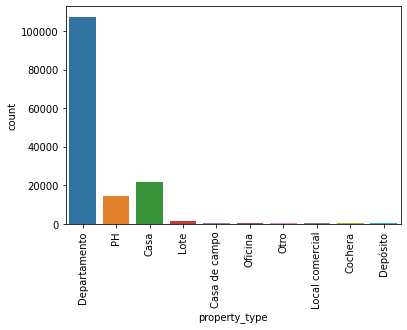

In [ ]:
import seaborn as sns
import numpy as np
#Mirar tipo de propiedad

chart=sns.countplot(x="property_type", data=data, order=['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

 **Averigue en el dataset los valores Faltantes**

In [ ]:
#Valores faltantes por columna uso funcion isna
print(df.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
title                  0
description            0
property_type          0
dtype: int64


-Verifico que en mis columnas que tienen datos faltantes (lat,lon,bathrooms,surface_total, surface_covered) son columnas de tipo de datos 'float',por lo tanto al no contener valores nominales en este caso el uso del encoding de pasar los datos a numeros no es necsario.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l2               146660 non-null  object 
 6   l3               146660 non-null  object 
 7   rooms            146660 non-null  float64
 8   bedrooms         146660 non-null  float64
 9   bathrooms        140703 non-null  float64
 10  surface_total    126133 non-null  float64
 11  surface_covered  125046 non-null  float64
 12  price            146660 non-null  float64
 13  title            146660 non-null  object 
 14  description      146660 non-null  object 
 15  property_type    146660 non-null  object 
dtypes: float64(8), object(8)
memory usage:

Utilice la "imputacion de valores faltantes" con la funcion fillna, ya que al ser valores float, coloque en los datos faltantes -realice una interpolacion- de los valores de la  columna para poder evaluar su comportamiento,teniendo presente el anterior proyecto se realizo una eliminacion total de los mismos, sobretodo en la columna 'bathrooms', es importante conocer en estas instancias que puede haber sucedido si existiera este valor. 

In [ ]:
#df.fillna(df.mean())
#inplace=True)
#df1 = df.fillna(df.median())#averiguar si puedo colocar el proemdio de los valores de la columna o interpolar
#print(df1.isna().sum())
#df1.shape

In [ ]:
#df[]. replace(1, inplace-True)
df1=df.fillna(1).interpolate()
#df1=df.fillna(1).mean()
print(df1.isna().sum())

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
description        0
property_type      0
dtype: int64


In [ ]:
df1.bedrooms.replace(0,1)

0         7.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
146655    1.0
146656    3.0
146657    1.0
146658    1.0
146659    2.0
Name: bedrooms, Length: 146660, dtype: float64

 **DATOS ATIPICOS O OUTLIERS**, se realiza una exploracion de datos de las siguientes columnas

In [ ]:
mascara= df1[(df1.property_type.isin(["Departamento","PH","Casa"])) &
             (df1.l2.isin(["Capital Federal"]))]

print("property_type:", mascara["property_type"].unique())
print("l2: ", mascara["l2"].unique())

property_type: ['Departamento' 'PH' 'Casa']
l2:  ['Capital Federal']


In [ ]:
df2=mascara[['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price','property_type']] 
df2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,9.148500e+04
mean,-32.834789,-55.481256,2.964278,1.960278,1.546855,101.746199,85.480833,2.595003e+05
std,7.726295,12.918624,1.314704,1.072946,0.854305,932.281228,738.718488,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000e+03
25%,-34.612822,-58.457320,2.000000,1.000000,1.000000,43.000000,40.000000,1.200000e+05
50%,-34.598136,-58.431416,3.000000,2.000000,1.000000,66.000000,58.000000,1.750000e+05
75%,-34.580059,-58.405752,4.000000,3.000000,2.000000,104.000000,90.000000,2.790000e+05
max,1.000000,1.000000,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


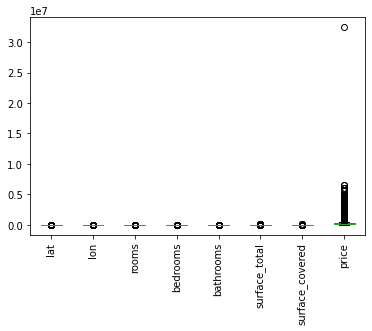

<Figure size 216000x108000 with 0 Axes>

In [ ]:
#En el siguiente grafica como los outliers pueden afectar la visibilidad en cuanto al analisis apropiado, de una parte de nuestro data frame:
import seaborn as sns
import  matplotlib.pyplot  as plt
import numpy as np

df3=df2.plot.box()
fig=plt.figure(figsize=(3000,1500))
df3.set_xticklabels(df3.get_xticklabels(), rotation=90)
plt.show()

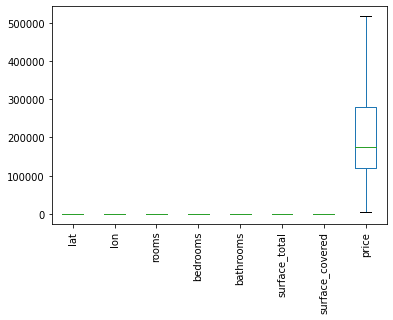

<Figure size 3600x10800 with 0 Axes>

In [ ]:
#En el siguiente grafica se puede visibilizar quitando los outliers que la dipersion de datos, al tener presente que algunos feature tiene valores grande con respecto 
#a los otros se trato determinar una mirada mas critica respecto al boxplot, los cuales no se pueden en gran medida apreciar todos , pero si determinar la afectacion
#y eliminacion de outliers
df3=df2.plot.box(showfliers = False)
fig=plt.figure(figsize=(50,150))
df3.set_xticklabels(df3.get_xticklabels(), rotation=90)
plt.show()


In [ ]:
#Identificammos cuales feature tiene mayor realcion con las demas, siendo "price", de mayor importancia frente a este tipo de dataset
df2.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,0.998369,0.018929,0.017392,0.076440,0.000277,0.001396,0.091386
lon,0.998369,1.000000,0.019227,0.017635,0.076676,0.000207,0.001328,0.091103
rooms,0.018929,0.019227,1.000000,0.927300,0.597767,0.064870,0.066894,0.448318
bedrooms,0.017392,0.017635,0.927300,1.000000,0.596487,0.064115,0.065833,0.413555
bathrooms,0.076440,0.076676,0.597767,0.596487,1.000000,0.053692,0.055198,0.585593
surface_total,0.000277,0.000207,0.064870,0.064115,0.053692,1.000000,0.770992,0.049909
surface_covered,0.001396,0.001328,0.066894,0.065833,0.055198,0.770992,1.000000,0.055373
price,0.091386,0.091103,0.448318,0.413555,0.585593,0.049909,0.055373,1.000000


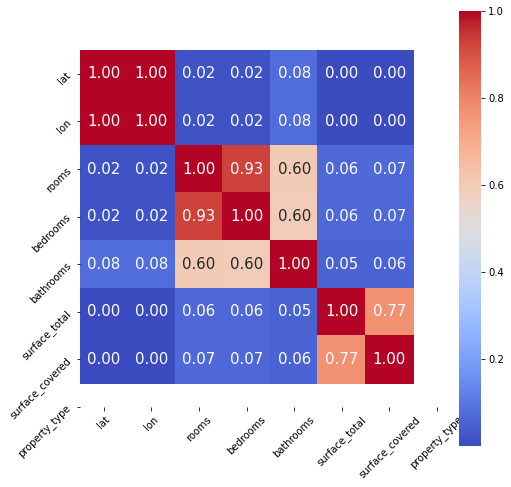

In [ ]:
corr = df2.drop(columns = 'price').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df2.drop(columns = 'price').columns, 
           yticklabels= df2.drop(columns = 'price').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

**REGLA DE LAS TRES SIGMAS= Se implemento la regla de las tres sigmas para cada una de las columnas de nuestro dataframe,donde destaque estas colummnas al ser mas relacionadas entre si,  y su vez determinar, cuales y en cuanta cantidad se encuentran  presenten los mayores outliers en el comportamiento de datos de  nuestro dataset, asi mismo analizarlos.

 **ENCODING-variables dummies**

In [ ]:
df3 = pd.get_dummies(df2, prefix='property_type_', columns=['property_type'])

In [ ]:
df3.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type__Casa,property_type__Departamento,property_type__PH
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1


In [ ]:
# se añade con el anterior dataframe y las juevas variables dummies
df4=pd.concat((df2,df3), axis =1 )

In [ ]:
df4

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type__Casa,property_type__Departamento,property_type__PH
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,-34.585355,-58.427194,4.0,3.0,3.0,175.0,111.0,570000.0,PH,-34.585355,-58.427194,4.0,3.0,3.0,175.0,111.0,570000.0,0,0,1
146555,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0,PH,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,1
146556,-34.584134,-58.436389,4.0,2.0,2.0,317.0,143.0,530000.0,PH,-34.584134,-58.436389,4.0,2.0,2.0,317.0,143.0,530000.0,0,0,1
146557,-34.583995,-58.417645,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento,-34.583995,-58.417645,3.0,2.0,2.0,145.0,145.0,420000.0,0,1,0


In [ ]:
## OUTLIERS--lat
valor_medio = df3.lat.mean()
std = df3.lat.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_lat = np.logical_or(df3.lat < minimo, df3.lat > maximo)
mascara_outliers_lat.sum()
#df2[mascara_outliers_lat]

4534

In [ ]:
## OUTLIERS--lon
valor_medio = df3.lon.mean()
std = df3.lon.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_lon = np.logical_or(df3.lon < minimo, df3.lon > maximo)
mascara_outliers_lon.sum()
#df2[mascara_outliers_lon]

4548

In [ ]:
## OUTLIERS--rooms
valor_medio = df3.rooms.mean()
std = df3.rooms.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_rooms = np.logical_or(df3.rooms < minimo, df3.rooms > maximo)
mascara_outliers_rooms.sum()
#df2[mascara_outliers_rooms]

1368

In [ ]:
## OUTLIERS--bedrooms
valor_medio = df3.bedrooms.mean()
std = df3.bedrooms.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_bedrooms = np.logical_or(df3.bedrooms < minimo, df3.bedrooms > maximo)
mascara_outliers_bedrooms.sum()
#df2[mascara_outliers_bedrooms]

588

In [ ]:
## OUTLIERS--bathrooms
valor_medio = df3.bathrooms.mean()
std = df3.bathrooms.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_bathrooms = np.logical_or(df3.bathrooms < minimo, df3.bathrooms > maximo)
mascara_outliers_bathrooms.sum()
#df2[mascara_outliers_bathrooms]

930

In [ ]:
## OUTLIERS--surface_total
valor_medio = df3.surface_total.mean()
std = df3.surface_total.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_surface_total = np.logical_or(df3.surface_total < minimo, df3.surface_total > maximo)
mascara_outliers_surface_total.sum()
#df2[mascara_outliers_surface_total]

118

In [ ]:
## OUTLIERS--surface_covered
valor_medio = df3.surface_covered.mean()
std = df3.surface_covered.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers_surface_covered = np.logical_or(df3.surface_covered < minimo, df3.surface_covered > maximo)
mascara_outliers_surface_covered.sum()
#df2[mascara_outliers_surface_covered]

108


**ENTRENAMIENTO DEL MODELO DEL PROYECTO 1-REALIZANDO PRE-PROCESAMIENTO DE DATOS( MISSING DATA/ OUTLIERS)** 

In [ ]:
X= df3[["rooms","bedrooms","surface_total","bathrooms", "surface_covered","property_type__Casa","property_type__Departamento","property_type__PH"]]
y=df3.price


**ESCALADO DE FEATURE-DESPUES DE ENTRENAMIENTO DE MODELO** 

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

#scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(X)
#scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
#scaled_df.head()

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.30, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(61294, 8) (30191, 8) (61294,) (30191,)


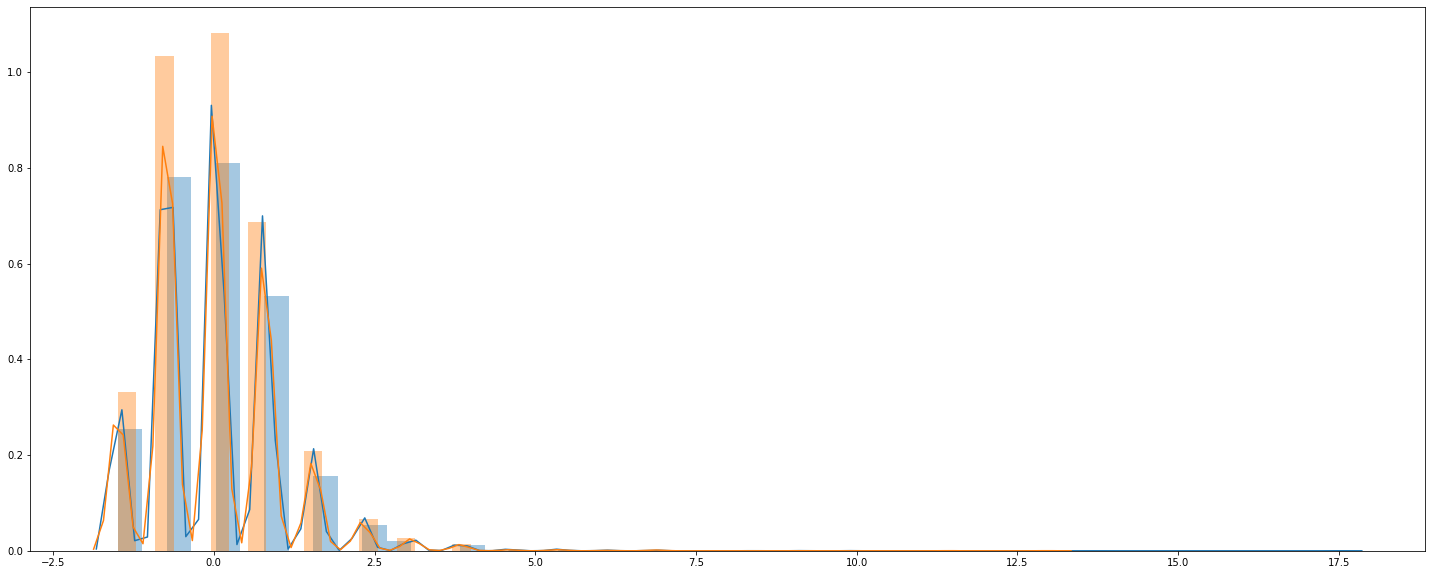

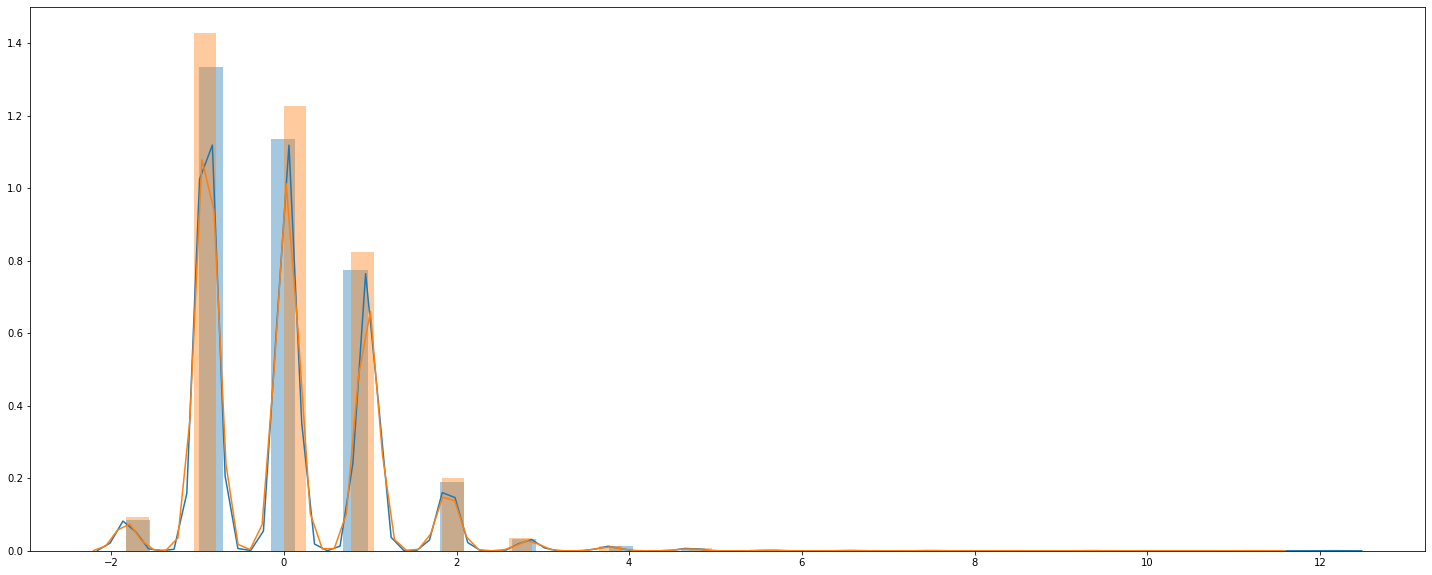

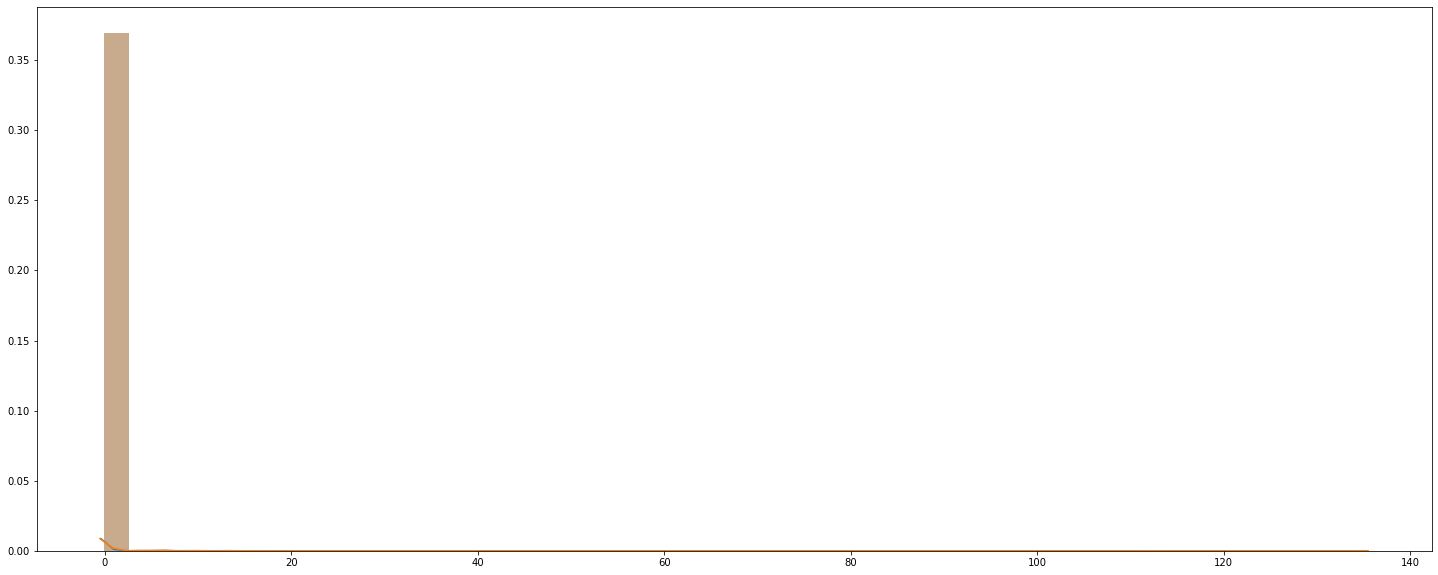

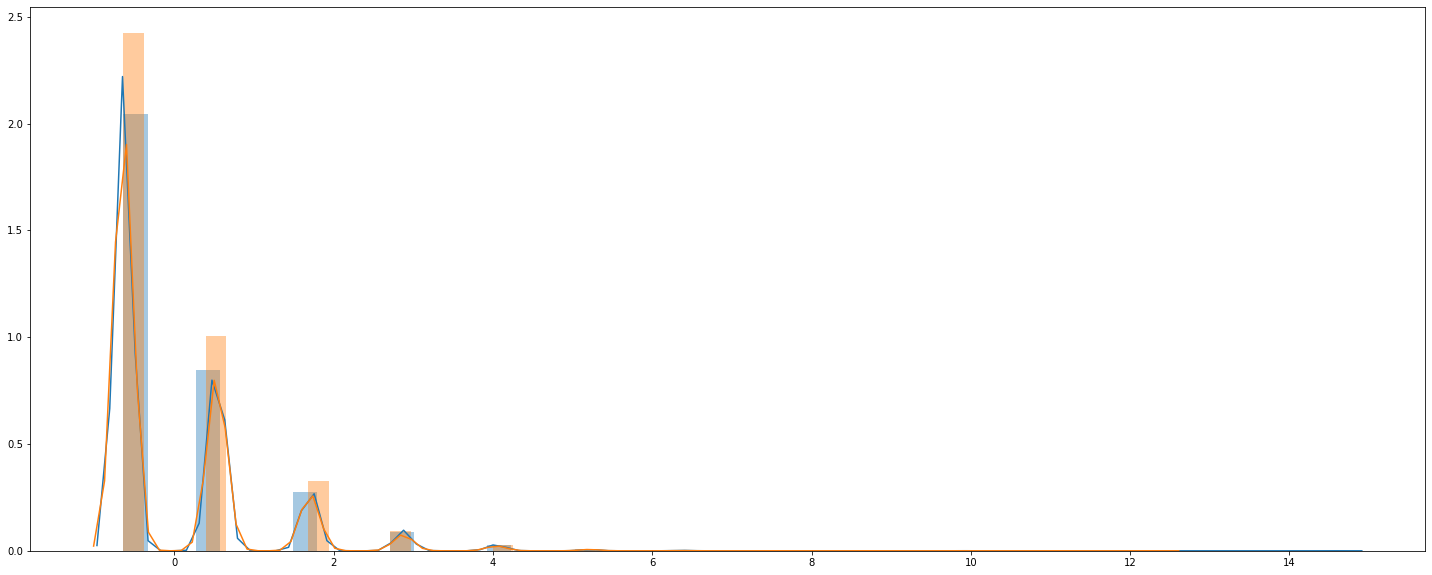

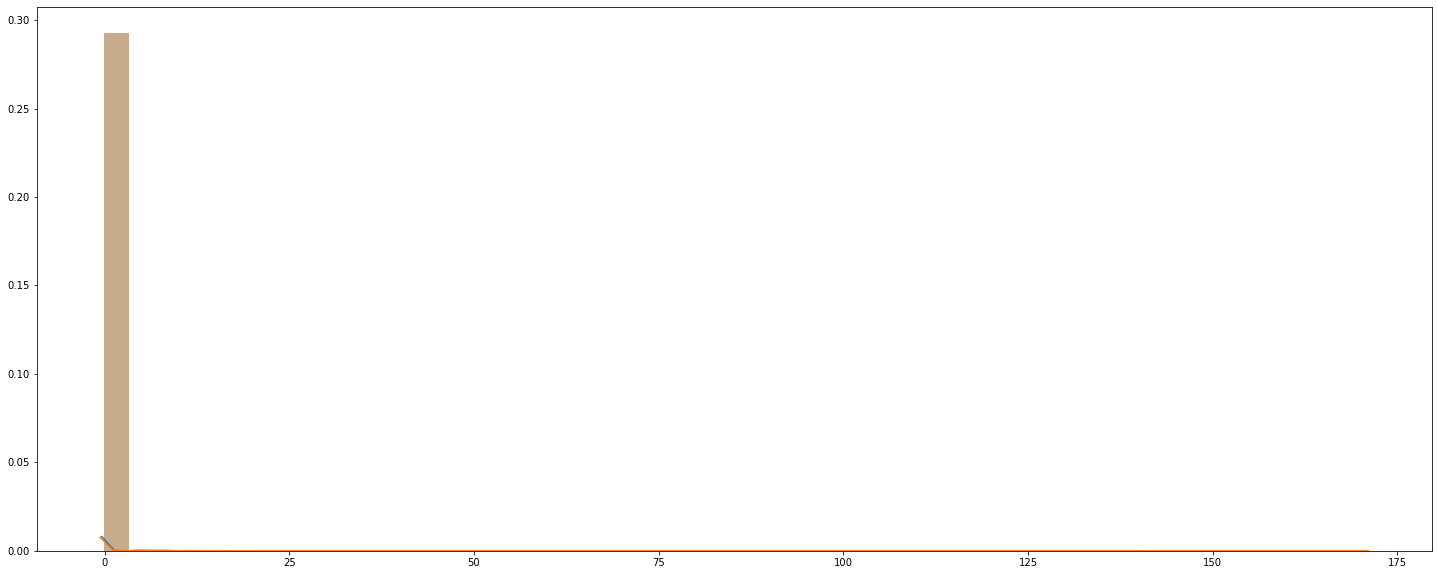

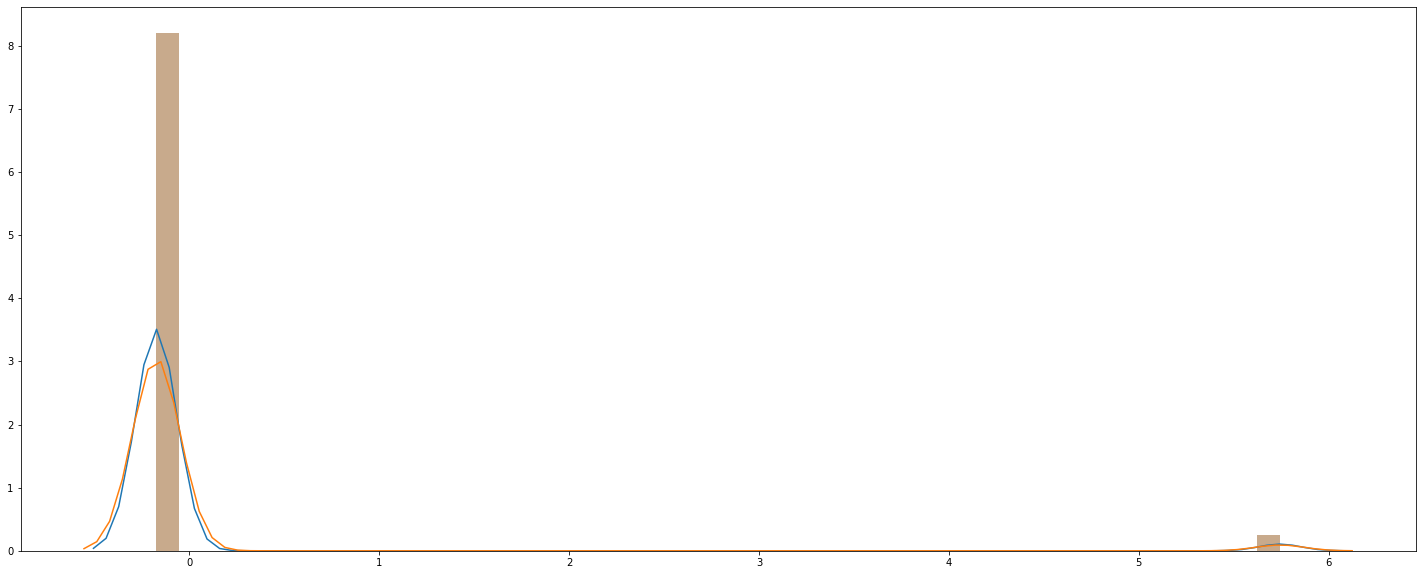

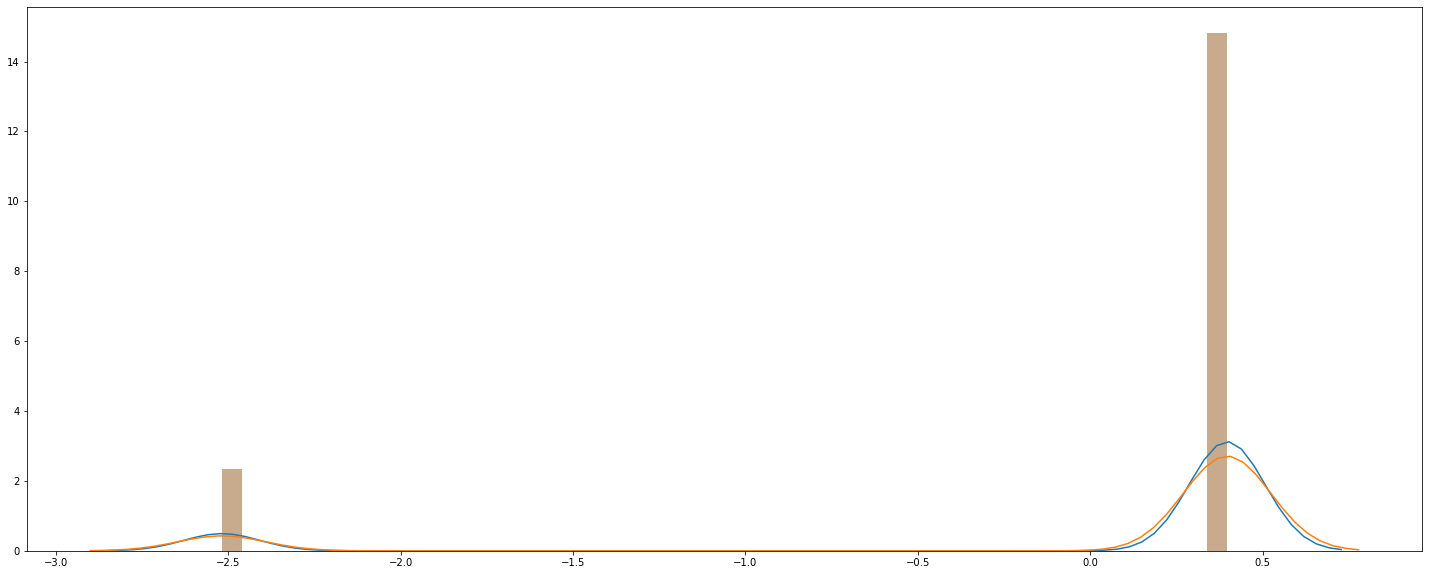

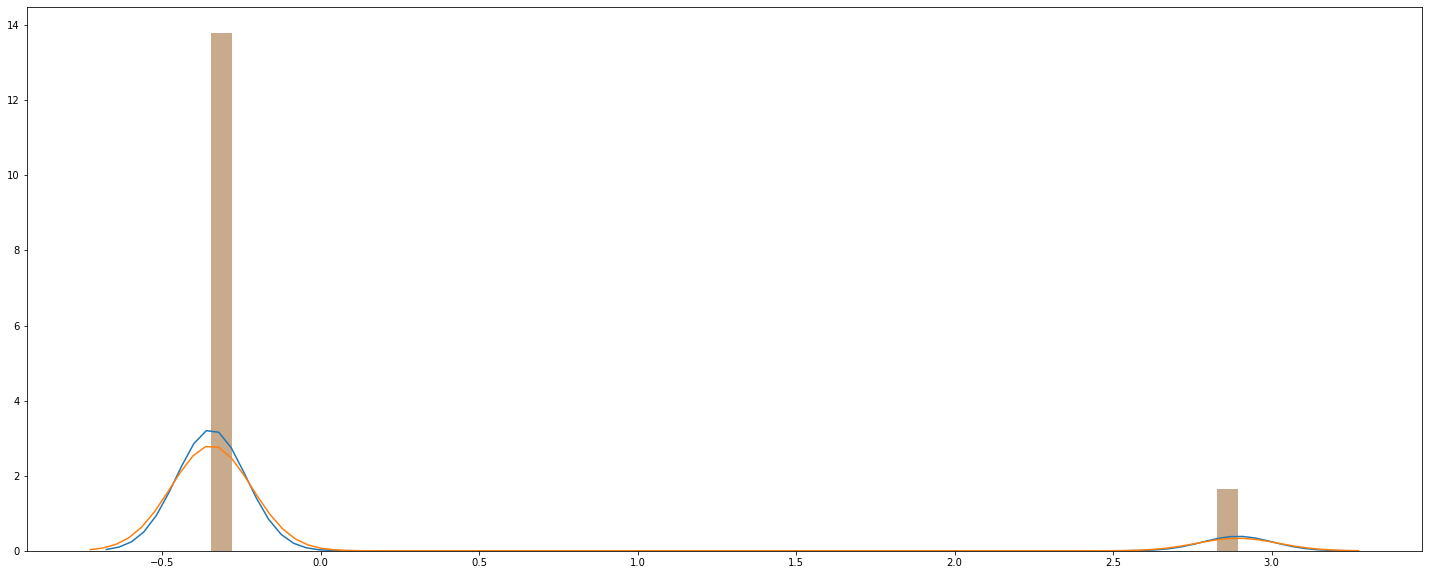

In [ ]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(25,10))
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

linear_model = LinearRegression()

In [ ]:
#Ajustando el modelo,entrenado los modelos
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Creamos un objeto arbol
tree =DecisionTreeRegressor(max_depth=8, random_state=42)
tree.fit(X_train, y_train)
y_pred= tree.predict(X_test)

In [ ]:
# Error de test del modelo DecisionTreeRegressor inicial

from sklearn.metrics import r2_score

R2 = tree.score(X,y)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
#R2 = metrics.mean_squared_error(y_test, y_pred)
print('R2:',R2)
print('RMSE:',RMSE)
print('MAE:',MAE)

R2: 0.8106374629659252
RMSE: 149711.8862576371
MAE: 67205.62106199669


In [ ]:
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(tree.score(X_train, y_train))

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.8341527565003842


In [ ]:
# Creamos un objeto arbol
#Modelos optimizando  la profundidad del árbol-----------------------------------------
tree=DecisionTreeRegressor(max_depth=18, random_state=42)
tree.fit(X_train, y_train)
y_pred= tree.predict(X_test)

In [ ]:
# Error de test del modelo DecisionTreeRegressor final
from sklearn.metrics import r2_score

R2 = tree.score(X,y)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
#R2 = metrics.mean_squared_error(y_test, y_pred)
print('R2:',R2)
print('RMSE:',RMSE)
print('MAE:',MAE)

R2: 0.7932478117751796
RMSE: 235217.22063175964
MAE: 53723.23809222558


In [ ]:
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(tree.score(X_train, y_train))

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.9565624871505801


In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []
#X_train = []
#y_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [2,4,6,8,10,12,14,16,18,20,22,24]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    tree =DecisionTreeRegressor(max_depth = max_depth, random_state=42)

    # Entrenar el modelo
    tree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    #MAE_train = metrics.mean_absolute_error(y_test, y_pred)
    #R2_train = tree.score(y_train, y_train_pred)
    #train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    #MAE_test = metrics.mean_absolute_error(y_test, y_pred)
    #R2_test = tree.score(y_test, y_test_pred)
    #test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)

Text(0, 0.5, 'RMSE')

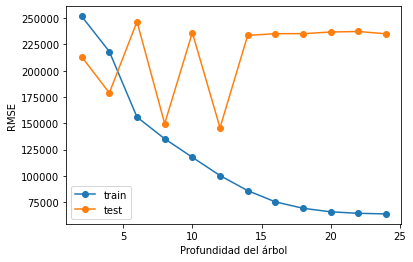

In [ ]:
plt.plot(max_depths,lista_train,'o-',label='train' )
plt.plot(max_depths,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.06443069e+05 -5.08600221e+04  5.03518290e+02  1.59547543e+05
  9.79126860e+03 -6.35219135e+17 -1.28907808e+18 -1.16058620e+18] 261197.2676006216


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors=10 # Cuando  el numero de vecinos es menor en el modelo es mas optimo
#clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

In [ ]:
knn_regressor.fit(X_train, y_train)
y_pred= knn_regressor.predict(X_test)

In [ ]:
# Error de test del modelo KNeighborsRegressor inicial

from sklearn.metrics import r2_score

R2 = knn_regressor.score(X,y)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
#R2 = metrics.mean_squared_error(y_test, y_pred)
print('R2:',R2)
print('RMSE:',RMSE)
print('MAE:',MAE)

R2: 0.7313031505620702
RMSE: 146721.7671388741
MAE: 59375.4715279388


In [ ]:
print('DATOS DEL MODELO VECINO MAS CERCANO REGRESION')
print()
print('Precisión del modelo:')
print(knn_regressor.score(X_train, y_train))

DATOS DEL MODELO VECINO MAS CERCANO REGRESION

Precisión del modelo:
0.7188277362180402


In [ ]:
# Modelos optimizando el número de vecinos---------------------------------------

from sklearn.neighbors import KNeighborsRegressor

n_neighbors=2 # Cuando  el numero de vecinos es menor en el modelo es mas optimo
#clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_regressor.fit(X_train, y_train)
y_pred= knn_regressor.predict(X_test)

In [ ]:
# Error de test del modelo KNeighborsRegressor final
from sklearn.metrics import r2_score

R2 = knn_regressor.score(X,y)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
#R2 = metrics.mean_squared_error(y_test, y_pred)
print('R2:',R2)
print('RMSE:',RMSE)
print('MAE:',MAE)

R2: 0.8536641724822087
RMSE: 141320.87969260282
MAE: 56323.836640058296


In [ ]:
print('DATOS DEL MODELO VECINO MAS CERCANO REGRESION')
print()
print('Precisión del modelo:')
print(knn_regressor.score(X_train, y_train))

DATOS DEL MODELO VECINO MAS CERCANO REGRESION

Precisión del modelo:
0.883660876200441


In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    #clf = KNeighborsClassifier(n_neighbors=k)
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    #clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred =  knn_regressor.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)

Text(0, 0.5, 'RMSE')

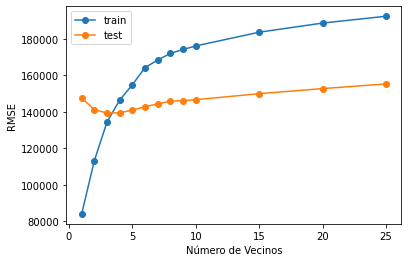

In [ ]:
plt.plot(k_vecinos,lista_train,'o-',label='train' )
plt.plot(k_vecinos,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')

Teniendo presente el pre-procesamiento que se realizo al entrenamiento de modelo del proyeto 1,  se puede evidenciar que la precision del modelo aumento favorablemente, ya que inicialmente el mejor modelo fue el el arbol de decision con una precicison del 0,95 frente 0,88 despues de realizar la trasnformacion de los datos, que es el valor que encontramos anteriormente, aunque la diferencia con respecto al knn-vecino mas cercano, presenta una gran diferencia de  0,88 frente a 0,64 con los anteriores datos del proyecto 1, sigue teniendo mejor ejecucion el arbol decision, frente al dataset que estamos manejando, de igual formas las metricas relacionados  presentan una  gran diferencia frente a la ultima vez e incorporando unas nuevas varaibles, que contribuyen en gran parte  en la toma de decision desde la vista del comprador como: "property_type_Casa, property_type_departamento, property_type_PH, surface_covered", que evidenciaron un fuerte impacto en el comportamiento de nuestros datos demostrados en las diferentes graficas, mejorando asi su precision y emejorando su analisis.
Esta mejora se debio al  haber realizado el metodo de escalado de datos, con la finalidad de  que el sistema tenga un rapido aprendizaje y un manejo mas agil con valores mas pequeños; no contribuyo en ningun cambio para la precision del modelo.

---

<br />
<br />

# PARTE B Modelos avanzados
<br />
<br />

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# Para seleccionar cuales serian nuestars variables mas predominantes con el precio se escogio las siguientes, aunque no se encuentran todas, las demas no se
#tuvieron en cuenta, ya que no presentaban un impacto importante en el comportamiento de los datos, y a su vez en la precision de los modelos.

X= df3.drop(["rooms","bedrooms","surface_total","bathrooms","property_type__Casa","property_type__Departamento","property_type__PH"],axis=1)
y=df3.price

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.30, stratify=y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

In [ ]:
y_train.min,y_train.max

(<bound method Series.min of 28314     289000.0
 116731    150000.0
 6742      240000.0
 82591     234999.0
 93656     129500.0
             ...   
 9809      320000.0
 84620     110000.0
 119682    274000.0
 1316      159600.0
 24708     138000.0
 Name: price, Length: 61294, dtype: float64>,
 <bound method Series.max of 28314     289000.0
 116731    150000.0
 6742      240000.0
 82591     234999.0
 93656     129500.0
             ...   
 9809      320000.0
 84620     110000.0
 119682    274000.0
 1316      159600.0
 24708     138000.0
 Name: price, Length: 61294, dtype: float64>)

In [ ]:
y_test.min,y_test.max

(<bound method Series.min of 128545     95000.0
 102582    163000.0
 122646    545000.0
 80009      95000.0
 140192    472900.0
             ...   
 95885      85000.0
 116158    108000.0
 49958     130000.0
 92978     300000.0
 95745     103500.0
 Name: price, Length: 30191, dtype: float64>,
 <bound method Series.max of 128545     95000.0
 102582    163000.0
 122646    545000.0
 80009      95000.0
 140192    472900.0
             ...   
 95885      85000.0
 116158    108000.0
 49958     130000.0
 92978     300000.0
 95745     103500.0
 Name: price, Length: 30191, dtype: float64>)


**1-Modelo=RandomforestRegressor** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(random_state=42)
params_forest = { "n_estimators":[200,250,300,350,400,450,500,550],"criterion":["mse"],"max_depth":[None],"max_features":["sqrt"],"bootstrap":[False]}
forest.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

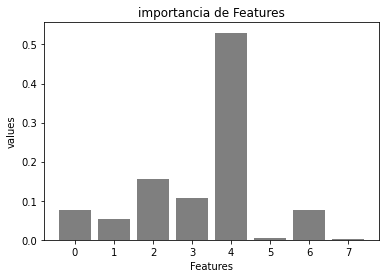

In [ ]:
importancia = forest.feature_importances_

for i,v in enumerate(importancia):
    
    plt.bar([x for x in range(len(importancia))], importancia)
plt.title("importancia de Features")
plt.ylabel("values")
plt.xlabel("Features")
plt.show()

In [ ]:
model_RF = GridSearchCV(forest, params_forest, cv=2,n_jobs=-1)
model_RF.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
print("Mejores parametros: "+str(model_RF.best_params_))
print("Mejor Score: "+str(model_RF.best_score_)+'\n')

scores = pd.DataFrame(model_RF.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 550}
Mejor Score: 0.7069386691682749



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
7,22.643478,0.059119,3.851655,0.037407,False,mse,None,sqrt,550,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609757,0.804120,0.706939,0.097182,1
6,20.132343,0.044215,3.575675,0.009846,False,mse,None,sqrt,500,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609705,0.803754,0.706730,0.097025,2
4,16.642779,0.035387,2.824463,0.005682,False,mse,None,sqrt,400,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609401,0.803038,0.706220,0.096818,3
5,18.080991,0.024271,3.183474,0.000377,False,mse,None,sqrt,450,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609600,0.802459,0.706030,0.096429,4
3,14.228011,0.005084,2.478129,0.004158,False,mse,None,sqrt,350,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609369,0.801688,0.705528,0.096160,5
2,12.075593,0.026755,2.129276,0.009143,False,mse,None,sqrt,300,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609275,0.798714,0.703995,0.094719,6
1,10.072681,0.051253,1.769895,0.003239,False,mse,None,sqrt,250,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609269,0.797976,0.703622,0.094354,7
0,8.317667,0.036371,1.424400,0.009045,False,mse,None,sqrt,200,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0.609123,0.796265,0.702694,0.093571,8


In [ ]:
forest_gv=model_RF.predict(X_test)

In [ ]:
Rf_Result=model_RF.score(X_test,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred_RF = model_RF.predict(X_train)
y_test_pred_RF = model_RF.predict(X_test)

rmse_train_RF = np.sqrt(mean_squared_error(y_train, y_train_pred_RF))
rmse_test_RF = np.sqrt(mean_squared_error(y_test, y_test_pred_RF))

print("RMSE en Train es:",rmse_train_RF)
print("RMSE en Test es:",rmse_test_RF)

RMSE en Train es: 63594.928267516116
RMSE en Test es: 131265.89911420745


In [ ]:
print('DATOS DEL MODELO RANDOM FOREST')
print()
print('Precisión del modelo:')
print(model_RF.score(X_train, y_train))

DATOS DEL MODELO RANDOM FOREST

Precisión del modelo:
0.9633729781073991


In [ ]:
import sklearn.metrics as metrics
# Definimos las listas vacias para los valores 
lista_train = []
lista_test = []
#oob_score = []

# Definimos la lista de valores de max_depth que vamos a explorar
n_estimators= [5,10,50,100,150,200,250,300,350,400,450,500,550]

# Generamos en loop sobre los distintos valores de profundidad 
for n_estimator in n_estimators:
    
    #RFR = RandomForestRegressor( random_state = 42)
    #forest = RandomForestRegressor(random_state=42)
    #params_forest = { "n_estimators":[500,1000,1500],"criterion":["mse"],"max_depth":[None],"max_features":["sqrt"],"bootstrap":[False]}
    model_RF = GridSearchCV(forest,params_forest = n_estimator, cv=2,n_jobs=-1)

    # Entrenar el modelo
    #model_RF.fit(X_train,y_train)
    model_RF.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred =model_RF.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = model_RF.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)
    #oob_score.append(RFR.oob_score_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be 

Text(0, 0.5, 'RMSE')

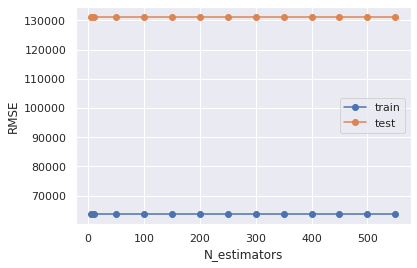

In [ ]:
plt.plot(n_estimators, lista_train,'o-',label='train' )
plt.plot(n_estimators, lista_test,'o-',label='test')
plt.legend()
plt.xlabel('N_estimators')
plt.ylabel('RMSE')


**2-Modelo=BaggingRegressor** 

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagging = BaggingRegressor(random_state=42)
params_bagging={"n_estimators":[10,50,100,150,200], "bootstrap":[True], "warm_start":[True],   }
bagging.fit

<bound method BaseBagging.fit of BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)>

In [ ]:
mod_bagging = GridSearchCV(bagging,param_grid=params_bagging, cv=2,n_jobs=-1)
mod_bagging.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'warm_start': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(mod_bagging.best_params_))
print("Mejor Score: "+str(mod_bagging.best_score_)+'\n')

scores = pd.DataFrame(mod_bagging.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'bootstrap': True, 'n_estimators': 150, 'warm_start': True}
Mejor Score: 0.7055134240872245



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_n_estimators,param_warm_start,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
3,9.037522,0.001918,1.190215,0.010532,True,150,True,"{'bootstrap': True, 'n_estimators': 150, 'warm...",0.605270,0.805757,0.705513,0.100243,1
2,6.050760,0.006103,0.784254,0.004948,True,100,True,"{'bootstrap': True, 'n_estimators': 100, 'warm...",0.605033,0.805962,0.705497,0.100464,2
1,3.029284,0.006395,0.399042,0.005112,True,50,True,"{'bootstrap': True, 'n_estimators': 50, 'warm_...",0.605771,0.804381,0.705076,0.099305,3
4,12.021767,0.012164,1.572540,0.000514,True,200,True,"{'bootstrap': True, 'n_estimators': 200, 'warm...",0.605168,0.804802,0.704985,0.099817,4
0,0.622089,0.006013,0.081035,0.000345,True,10,True,"{'bootstrap': True, 'n_estimators': 10, 'warm_...",0.599732,0.794796,0.697264,0.097532,5


In [ ]:
bagging_gv=mod_bagging.predict(X_test)
bagging_result=mod_bagging.score(X_test,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred_bagging = mod_bagging.predict(X_train)
y_test_pred_bagging = mod_bagging.predict(X_test)

rmse_train_bagging = np.sqrt(mean_squared_error(y_train, y_train_pred_bagging))
rmse_test_bagging = np.sqrt(mean_squared_error(y_test, y_test_pred_bagging))

print("RMSE en Train es:",rmse_train_bagging)
print("RMSE en Test es:",rmse_test_bagging)

RMSE en Train es: 89142.75104990104
RMSE en Test es: 160296.92986309552


In [ ]:
print('DATOS DEL MODELO bagging')
print()
print('Precisión del modelo:')
print(mod_bagging.score(X_train, y_train))

DATOS DEL MODELO bagging

Precisión del modelo:
0.9280337770305098


In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []
#X_train = []
#y_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
n_estimators= [5,10,50,100,150,200,250,300,350,400,450,500,550]

# Generamos en loop sobre los distintos valores de profundidad 
for n_estimator in n_estimators:
    
    #DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    mod_bagging = GridSearchCV(bagging,param_grid=params_bagging, cv=2,n_jobs=-1)
   

    # Entrenar el modelo
    mod_bagging.fit(X_train, y_train)
    #RFR.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred =mod_bagging.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    #MAE_train = metrics.mean_absolute_error(y_test, y_pred)
    #R2_train = tree.score(y_train, y_train_pred)
    
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = mod_bagging.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    #MAE_test = metrics.mean_absolute_error(y_test, y_pred)
    #R2_test = tree.score(y_test, y_test_pred)
   
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)

Text(0, 0.5, 'RMSE')

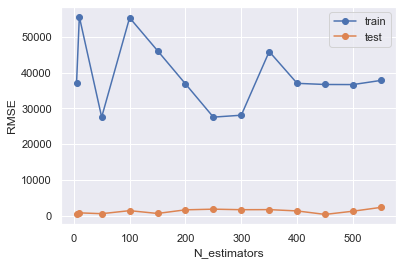

In [ ]:
plt.plot(n_estimators,lista_train,'o-',label='train' )
plt.plot(n_estimators,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('N_estimators')
plt.ylabel('RMSE')


**3-Modelo=AdaBoostRegressor** 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada=AdaBoostRegressor(random_state=42)
params_ada={"n_estimators":[50,100,150.200,250,300,350,400,450,500,550],"learning_rate":[0.1],"loss":["linear"]}
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=42)

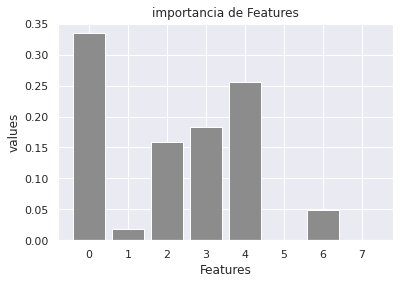

In [ ]:
importancia = ada.feature_importances_

for i,v in enumerate(importancia):
    
    plt.bar([x for x in range(len(importancia))], importancia)
plt.title("importancia de Features")
plt.ylabel("values")
plt.xlabel("Features")
plt.show()

In [ ]:
model_ada = GridSearchCV(ada,param_grid=params_ada, cv=2,n_jobs=-1)
model_ada.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=2, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=42),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['linear'],
                         'n_estimators': [50, 100, 150.2, 250, 300, 350, 400,
                                          450, 500, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred_model_ada = model_ada.predict(X_train)
y_test_pred_model_ada = model_ada.predict(X_test)

rmse_train_model_ada = np.sqrt(mean_squared_error(y_train, y_train_pred_model_ada))
rmse_test_model_ada = np.sqrt(mean_squared_error(y_test, y_test_pred_model_ada))

print("RMSE en Train es:",rmse_train_model_ada)
print("RMSE en Test es:",rmse_test_model_ada)

RMSE en Train es: 193739.1944220472
RMSE en Test es: 228045.7363662213


In [ ]:
print('DATOS DEL MODELO AdaBoostRegressor')
print()
print('Precisión del modelo:')
print(model_ada.score(X_train, y_train))

DATOS DEL MODELO AdaBoostRegressor

Precisión del modelo:
0.660068333309462


In [ ]:
print("Mejores parametros: "+str(model_ada.best_params_))
print("Mejor Score: "+str(model_ada.best_score_)+'\n')

scores = pd.DataFrame(model_ada.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}
Mejor Score: 0.5319574109699752



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.961981,0.009328,0.166469,0.003781,0.1,linear,50,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.505582,0.558333,0.531957,0.026375,1
1,3.867487,0.026259,0.312549,0.006468,0.1,linear,100,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.489510,0.503824,0.496667,0.007157,2
3,9.047287,0.327601,0.879213,0.048179,0.1,linear,250,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.465473,-0.120616,0.172428,0.293044,3
4,9.918423,1.157060,0.941034,0.153559,0.1,linear,300,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.465473,-0.250806,0.107334,0.358139,4
5,10.683921,2.080943,1.105061,0.318376,0.1,linear,350,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.465473,-0.352672,0.056400,0.409073,5
6,11.038654,2.437627,1.113800,0.320843,0.1,linear,400,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.465473,-0.354240,0.055616,0.409857,6
7,10.936226,2.247820,1.085512,0.302491,0.1,linear,450,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.465473,-0.354240,0.055616,0.409857,6
8,10.870328,2.350355,1.129498,0.266797,0.1,linear,500,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.465473,-0.354240,0.055616,0.409857,6
9,9.143612,0.603750,0.901570,0.110487,0.1,linear,550,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.465473,-0.354240,0.055616,0.409857,6
2,0.006262,0.001490,0.000000,0.000000,0.1,linear,150.2,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",NaN,NaN,NaN,NaN,10


In [ ]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [ ]:

# Definimos las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
n_estimators= [5,10,50,100,150,200,250,300,350,400,450,500,550]

# Generamos en loop sobre los distintos valores de profundidad 
for n_estimator in n_estimators:
    
    model_ada = GridSearchCV(ada,param_grid=params_ada, cv=2,n_jobs=-1)
    #RFR = RandomForestRegressor(n_estimator, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)

    # Entrenar el modelo
    model_ada.fit(X_train, y_train)
    #RFR.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred =model_ada.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = model_ada.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)

Text(0, 0.5, 'RMSE')

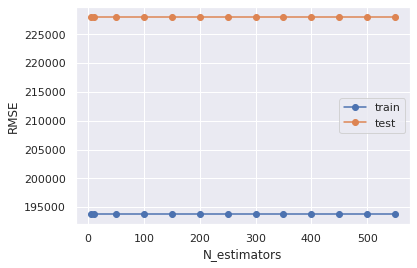

In [ ]:
plt.plot(n_estimators,lista_train,'o-',label='train' )
plt.plot(n_estimators,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('N_estimators')
plt.ylabel('RMSE')


**COMPARACION DEL ERROR EN LOS TRES MODELOS** 

Modelo: RandomforestRegressor
Raíz del error cuadrático medio en Train: 63594.928267516116
Raíz del error cuadrático medio en Test: 131265.89911420745


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


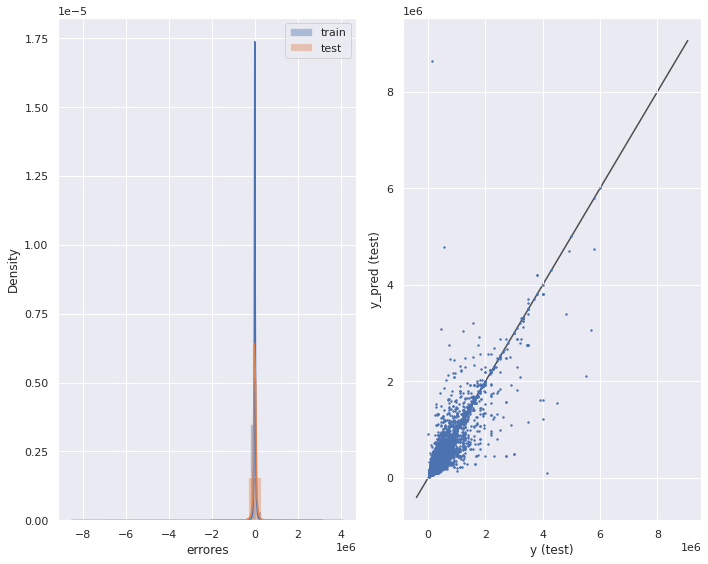

Modelo: BaggingRegressor
Raíz del error cuadrático medio en Train: 89148.9621951304
Raíz del error cuadrático medio en Test: 160471.2943415638


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


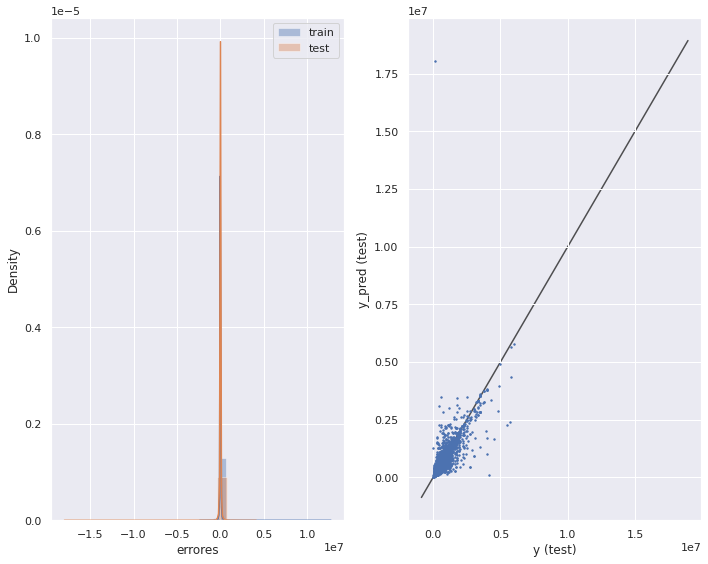

Modelo: AdaBoostRegressor
Raíz del error cuadrático medio en Train: 193739.1944220472
Raíz del error cuadrático medio en Test: 228045.7363662213


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


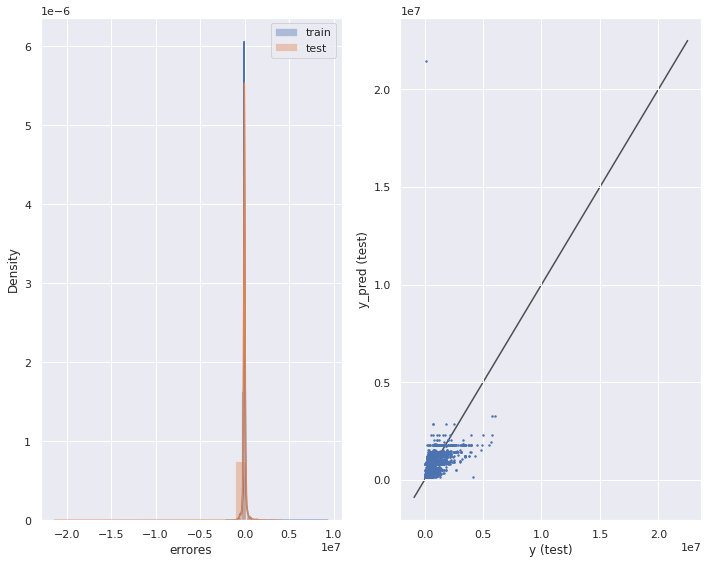

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['RandomforestRegressor', 'BaggingRegressor', 'AdaBoostRegressor']

for i, model in enumerate([model_RF, mod_bagging, model_ada]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

---

<br />
<br />

# PARTE C - PREGUNTAS
<br />
<br />

---

### Preguntas:



¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?



### Analisis y respuestas de las incognitas:



Teniendo presente las etapas para una solución impecable de nuestro modelo, y aprendizajes previos adquiridos en el desarrollo de nuestro proyecto 1, se considero realizar unos ajustes incorporando nuevas temáticas en base a la implementación de nuevos modelos avanzados y seleccionado hiperparametros adecuados. Como sabemos el objetivo principal es describir detalladamente los procedimientos que se tuvieron en cuenta en este proyecto 2. 
Por lo tanto, como primera mano se elaboró el análisis exploratorio, esto con la finalidad de familiarizarte con datos, saber de qué tratan y como se componen, identificando cuales podrían ser nuestros posibles features más relevantes y entender su comportamiento, comparándolo con los modelos usados en el proyecto 1 y el porcentaje de precisión de los mismos. En el momento de utilizar los mismo features se evidencia que a grandes rasgos no genero ningún tipo de cambio; se decidió cambiarlos he incorporar unas nuevas variables, las cuales fueron elegidas gracias a su comportamiento en el pre-procesamiento de los datos, ya que cumplen con una alta relación con nuestra variable y= Price, los cuales fueron :  “rooms”, “bedrooms”, “bathrooms”, “Surface_total”, “Property_Casa”, “Property_PH”, “Property_Departramento”; estas ultimas variables me causaron cierta curiosidad para abordarlas, ya que al realizar un desglose pertinente en el feature “Property_type”, se demostró que componen en gran parte el dataset con referencia a los demás, por tal motivo se selccionaron. 
En cuanto a lo modelos avanzados, quise vincular tres, los cuales fueron: RandomForestRegressor( Relacionado con nuestro modelo TreeDecisionRegressor), Bagging( Abordaron como primera medida nuestro sesgo y varianza), y AdaBoostRegressor(Entrenando n-veces, el conjunto anterior, mejorando la optimización);Lo siguiente ha esto fue la etapa de ejecución de cada uno con el hiper-parametro “GridSearch”, los resultados fueron los siguientes:
-	RandomForestRegressor:
•	Rmse en train = 63594
•	Rmse en test = 131265
•	Precisión= 0,9633…….
•	Variables destacadas= “Property_Casa”, “Surface_total”, “bathrooms”,

-	BaggingRegressor:
•	Rmse en train = 89142
•	Rmse en test=160296
•	Precisión= 0,9280…….

-	AdaboostRegressor:
•	Rmse en train = 193739
•	Rmse en test = 228045
•	Precisión= 0,6656……
•	Variables destacadas= “rooms”, “Property_Casa”, “Surface_total”,

Según lo anteriormente escrito se puede mostrar que el  mejor desempeño de los modelos fue  RandomForest Regressor con alta preciso del 0,96 y  Rmse menores a los otros modelos, además de manejar  parámetro de n-estimatiors=550, y al  compararlo con nuestro mejor modelo de nuestro proyecto 1 el cual fue TreeDecisionRegressor, se efectuo un re-entrenamiento con estas mismas variables en nuestra “x” sin  cambiar el eje “y” se dedujo que el entrenamiento realizado tuvo un mejor precisión pasando de 0,80 a 0,95, utilizando le mismo maxdepth=18, esto nos hace pensar que no debemos descartar variables porque si, antes se debe realizar un debido análisis a cada una de ellas, para asociar  o no en nuestros modelos. 
Como comentaba en mi reseña del proyecto 1, seria conveniente saber porque este tipo de propiedades, se encuentran con mayor presencia para la venta de las mismas; no se conoce si anteriormente el proceso de construcción de este dataset, se tuvieron en cuenta otro tipo de temas , ya sea culturales, convivenciales, económicos, políticos, según su ubicación, es pertinente considerar hoy en día el tipo de personas que cuenta con solventacion económico, esto quiere decir que están dispuestas ha invertir en dicha propiedad y responder por los gastos que allí se generen, además de cumplir con el perfil de un posible comprador , el cual  ayudaría a conocer nuestros posibles clientes de primera mano, para la venta o arriendos de los  inmuebles, a su vez se podría predecir mejor que tipo de propiedad son mas atractivas para nuestro consumidores. 



---

<br />
<br />

# DESAFIO
<br />
<br />

---

### Arreglo de Features automático

En cuanto al desafio se decidio un realizar una reduccion de dimensionalidad, esto con la finalidad de de mejorar los atributos para entrenar los modelos y mejorar su precision. 





In [ ]:
X= df2[["rooms","bedrooms","surface_total","bathrooms"]]
y=df2.price

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_nuevo = pca.fit_transform(X) 

In [ ]:
pca.components_

array([[ 9.14794549e-05,  7.37887108e-05,  9.99999992e-01,
         4.92016896e-05],
       [ 7.31758321e-01,  5.88736506e-01, -1.27278500e-04,
         3.43393461e-01]])

Text(0, 0.5, 'X_nuevo[:,1]')

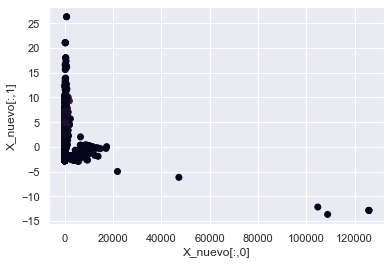

In [ ]:
plt.scatter(X_nuevo[:,0], X_nuevo[:,1], c = y)
plt.xlabel('X_nuevo[:,0]')
plt.ylabel('X_nuevo[:,1]')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [ ]:
regresor2 = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
regresor2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=24, random_state=42)

In [ ]:
y_train_pred = regresor2.predict(X_train)
y_test_pred = regresor2.predict(X_test)
print(metrics.mean_squared_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))

11069386235.824259
30566707057.96065


In [ ]:
print('DATOS DEL MODELO PCA')
print()
print('Precisión del modelo:')
print(regresor2.score(X_train, y_train))

DATOS DEL MODELO PCA

Precisión del modelo:
0.8997509684862072


In [ ]:
regresor2.feature_importances_

array([0.76527295, 0.23472705])

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_train = []
lista_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths= [5,10,50,100,150,200,250,300,350,400,450,500,550]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    regresor2 = DecisionTreeRegressor(max_depth = max_depth, random_state=42)

    #RFR = RandomForestRegressor(n_estimator, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)

    # Entrenar el modelo
    regresor2.fit(X_train, y_train)
    #RFR.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred =regresor2.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = regresor2.predict(X_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train.append(RMSE_train)
    lista_test.append(RMSE_test)

Text(0, 0.5, 'Exactitud')

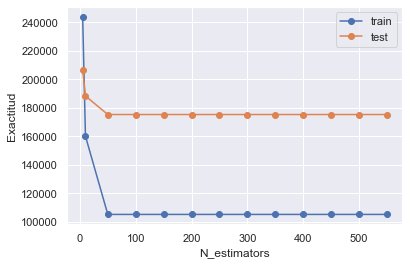

In [ ]:
plt.plot(n_estimators,lista_train,'o-',label='train' )
plt.plot(n_estimators,lista_test,'o-',label='test')
plt.legend()
plt.xlabel('N_estimators')
plt.ylabel('Exactitud')

Con una presicion del modelo de  0.76, despues de hacer el arreglo de fetures automatico PCA en nuestra variable X, se puede evidenciar en la grafica que existe un muy alta varianza en el entrenamiento de nuestro modelo, por lo tanto al analizar debe existir un compartamiemnto no adecuado por parte de los datos que nos estan generando un leve sobreajuste.







In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor( random_state = 42)
param_RFR = {"n_estimators":[100, 500, 1000], "criterion":["mse"], "max_depth":[None], "max_features":["sqrt"], "bootstrap":[False]}


from sklearn.model_selection import GridSearchCV #HIPERPARAMETRO DE OPTIMIZACION 

model_RF = GridSearchCV(RFR, param_RFR ,cv=4,n_jobs=-2)
model_RF.fit(X_train,y_train)
print (model_RF.best_params_)

#forest = RandomForestRegressor(random_state=42)
#params_forest = {"n_estimators":[500,1000,1500], "criterion":["mse"], "max_depth":[None], "max_features":["sqrt"], "bootstrap":[False]}